In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
data_path = '/home/jovyan/work/preparation'
file_name = 'titanic.csv'
titanic_file = os.path.join(data_path, 'titanic.csv')
titanic_df = pd.read_csv(titanic_file)

In [3]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### checking missing value

In [10]:
(titanic_df.isnull().sum()/titanic_df.shape[0]  *100).sort_values(ascending = False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

### Checking outlier

<AxesSubplot:xlabel='Age'>

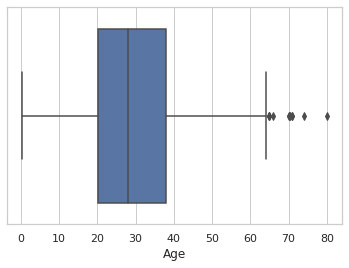

In [4]:
sns.boxplot(x=titanic_df['Age'])

In [5]:
youngest = titanic_df['Age'].min()
oldest = titanic_df['Age'].max()
print(f'youngest survivor: {youngest} \n oldest survivor: {oldest}')

youngest survivor: 0.42 
 oldest survivor: 80.0


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

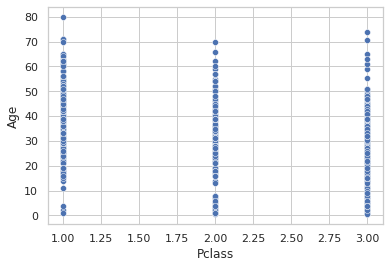

In [6]:
sns.scatterplot(data=titanic_df, x="Pclass", y="Age")

<AxesSubplot:xlabel='Age', ylabel='Fare'>

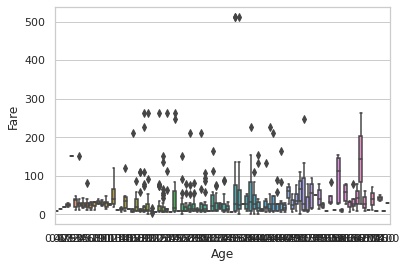

In [7]:
sns.boxplot(x='Age', y='Fare', data=titanic_df)

### Pearson correlation check

In [8]:
titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### Factorplot 

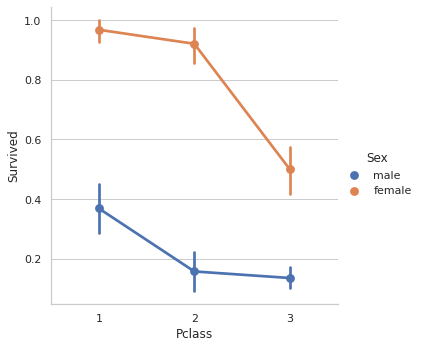

In [9]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df, kind='point')